## Задача 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Найти частное решение уравнения:
$$
y' + 2y = x^2
$$
С начальным условием: $$y(0) = 1$$

In [2]:
y0 = 1

In [3]:
h = 0.1
n = (int)(1 / h)
x = np.linspace(0, 1, n + 1)

Точное решение уравнения имеет вид:
$$
y^* = \frac{3}{4} e^{-2x} + \frac{1}{2} x^2 - \frac{1}{2} x + \frac{1}{4}
$$

Найдем точное решение:

In [4]:
y_real = np.zeros(n + 1)

y_real = 0.75 * np.exp(-2 * x) + 0.5 * np.power(x, 2) - 0.5 * x + 0.25

#### Метод Эйлера

Решим методом Эйлера:  

Пусть 
$$
f(x, y) = y'
$$
Тогда 
$$
y_{n + 1} = y_n + h f(x_n, y_n)
$$

In [5]:
def func(x, y):
    return x**2 - 2*y

In [6]:
y_euler = np.zeros(n + 1)
y_euler[0] = y0

for i in range (1, n + 1):
    y_euler[i] = y_euler[i - 1] + h * func(x[i - 1], y_euler[i - 1])

#### Улучшенный метод Эйлера

Если 
$$
k_1 = f(x_n, y_n)
$$

$$
k_2 = f(x_{n + 1}, y_n + hk_1)
$$
То 
$$
y_{n + 1} = y_n + \frac{h}{2}(k_1 + k_2)
$$

In [7]:
y_euler2 = np.zeros(n + 1)

y_euler2[0] = y0

for i in range(1, n + 1):
    k1 = func(x[i - 1], y_euler2[i - 1])
    y_euler2[i] = y_euler2[i - 1] + 0.5 * h * (k1 + func(x[i], y_euler2[i - 1] + h * k1))

#### Метод Рунге-Кутты

Рассмотрим метод Рунге-Кутты 4ого порядка.  
Если 
$$
k_1 = h f(x_n, y_n)
$$

$$
k_2 = h f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2})
$$

$$
k_3 = h f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2})
$$

$$
k_4 = h f(x_{n + 1}, y_n + k_3)
$$
То 
$$
y_{n + 1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

In [8]:
y_rk = np.zeros(n + 1)

y_rk[0] = y0

for i in range(1, n + 1):
    k1 = h * func(x[i - 1], y_rk[i - 1])
    k2 = h * func(x[i - 1] + 0.5 * h, y_rk[i - 1] + 0.5 * k1)
    k3 = h * func(x[i - 1] + 0.5 * h, y_rk[i - 1] + 0.5 * k2)
    k4 = h * func(x[i], y_rk[i - 1] + k3)
    
    y_rk[i] = y_rk[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

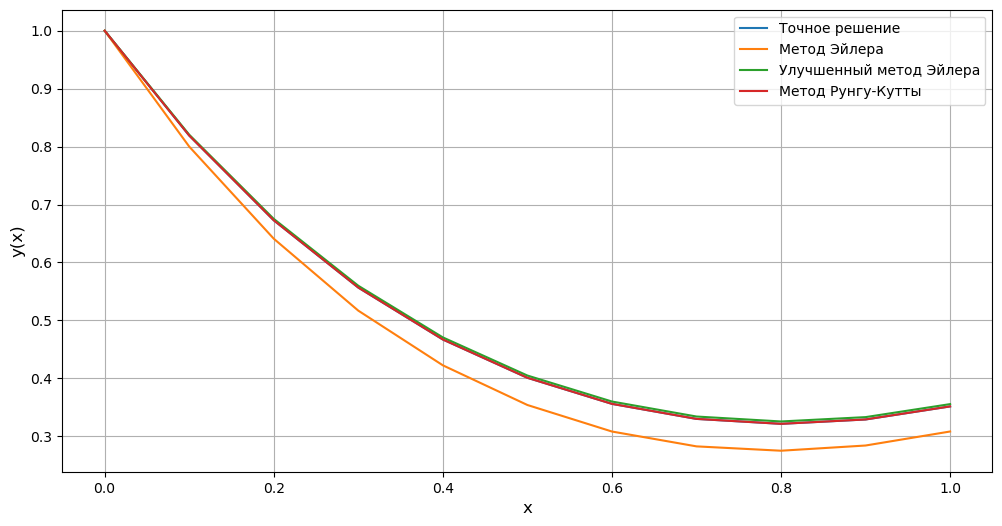

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, y_real, label='Точное решение')
plt.plot(x, y_euler, label='Метод Эйлера')
plt.plot(x, y_euler2, label='Улучшенный метод Эйлера')
plt.plot(x, y_rk, label='Метод Рунге-Кутты')
plt.ylabel('y(x)',fontsize=12)
plt.xlabel('x',fontsize=12)
plt.legend()
plt.grid()
plt.show()      